<a href="https://colab.research.google.com/github/Ammar-bin-Akram/Sign-Language-Detection/blob/main/Hand_Gesture_Detection_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
# unzipping the data
!unzip /content/drive/MyDrive/asl_alphabet_train.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/asl_alphabet_train/B/B788.jpg  
  inflating: /content/data/asl_alphabet_train/B/B787.jpg  
  inflating: /content/data/asl_alphabet_train/B/B785.jpg  
  inflating: /content/data/asl_alphabet_train/B/B781.jpg  
  inflating: /content/data/asl_alphabet_train/B/B78.jpg  
  inflating: /content/data/asl_alphabet_train/B/B775.jpg  
  inflating: /content/data/asl_alphabet_train/B/B774.jpg  
  inflating: /content/data/asl_alphabet_train/B/B770.jpg  
  inflating: /content/data/asl_alphabet_train/B/B77.jpg  
  inflating: /content/data/asl_alphabet_train/B/B767.jpg  
  inflating: /content/data/asl_alphabet_train/B/B765.jpg  
  inflating: /content/data/asl_alphabet_train/B/B764.jpg  
  inflating: /content/data/asl_alphabet_train/B/B763.jpg  
  inflating: /content/data/asl_alphabet_train/B/B758.jpg  
  inflating: /content/data/asl_alphabet_train/B/B746.jpg  
  inflating: /content/data/asl_alphabet_train/B/B744.jpg  
  infla

In [13]:
# getting dimensions of image from each directory
signs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
for i in signs:
  img = cv2.imread('/content/data/asl_alphabet_train/' + i +'/'+ i + '1.jpg')
  print(img.shape)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


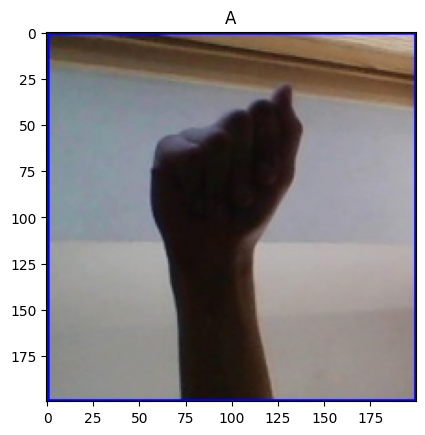

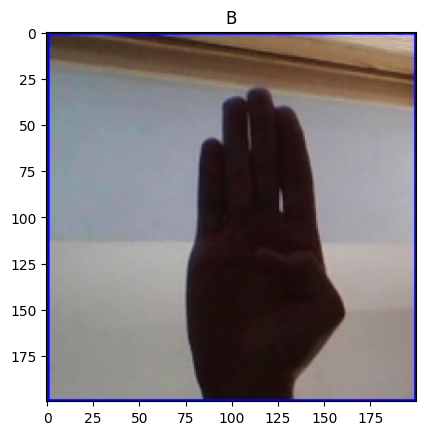

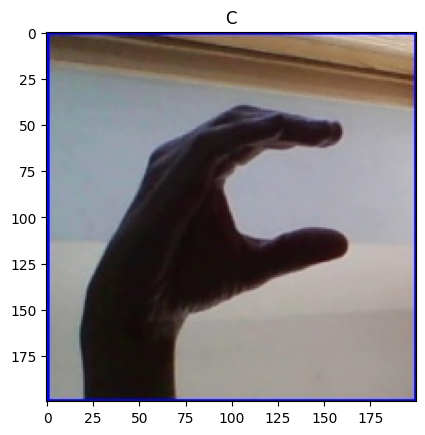

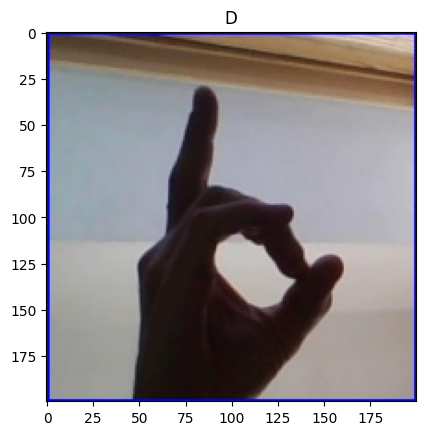

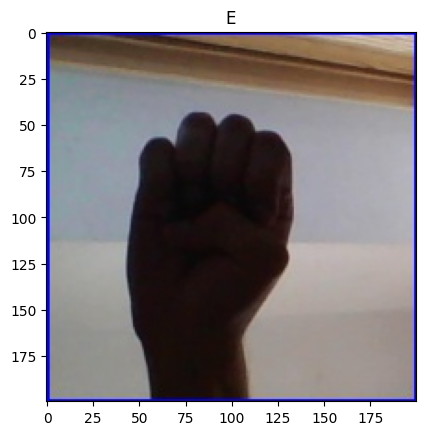

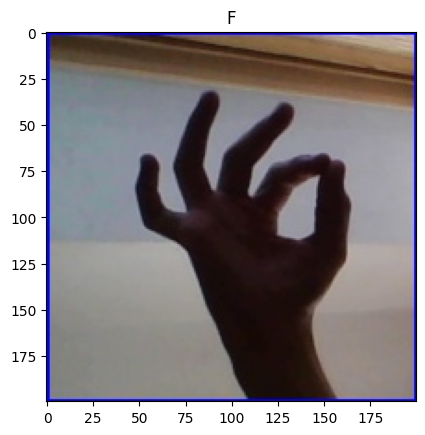

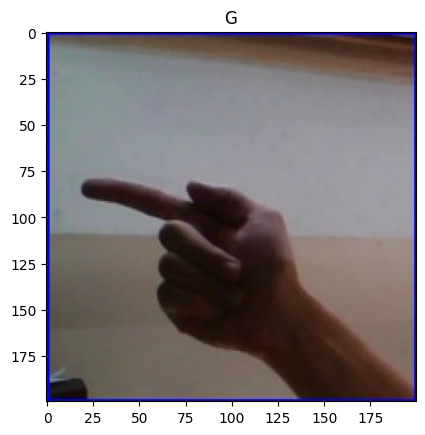

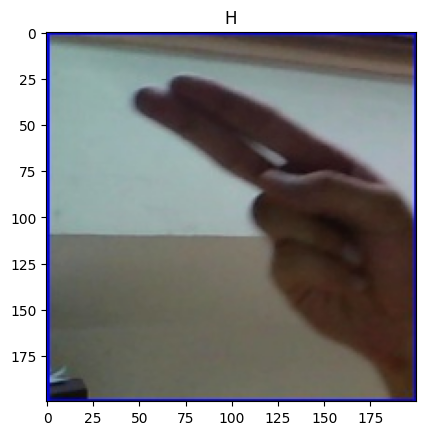

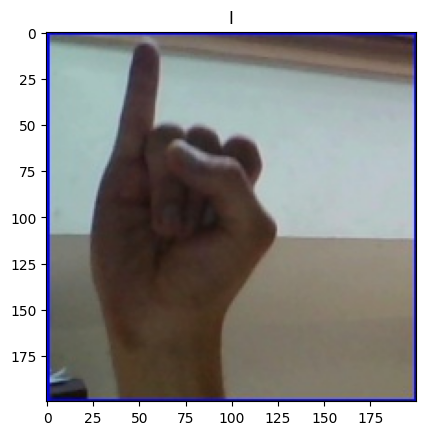

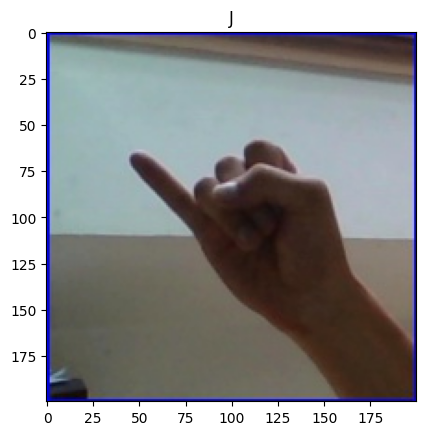

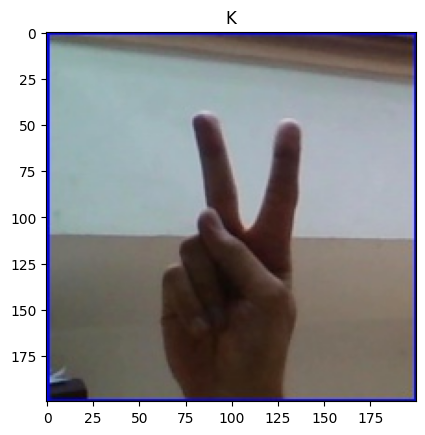

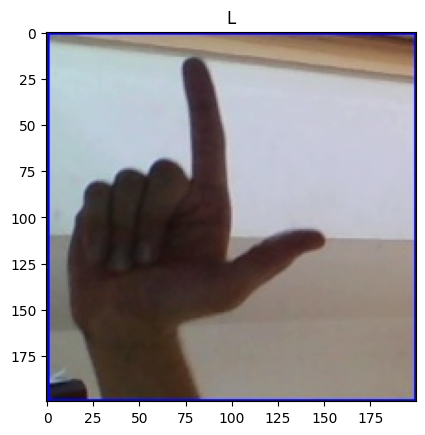

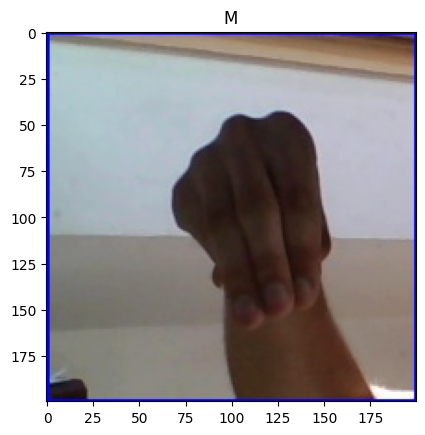

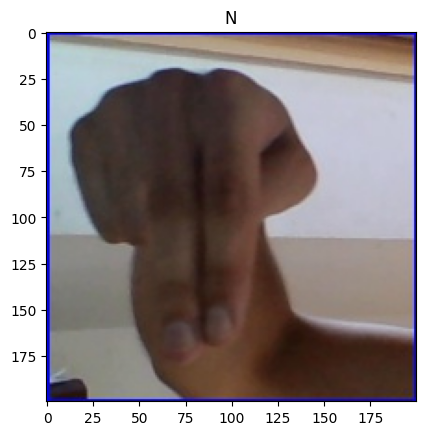

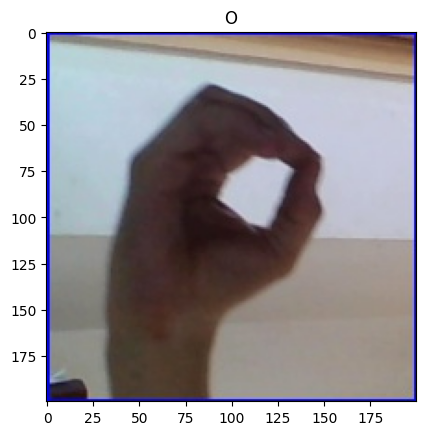

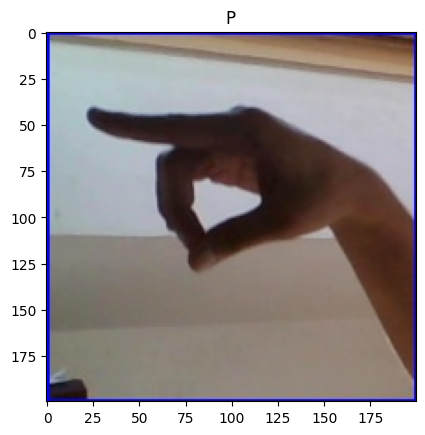

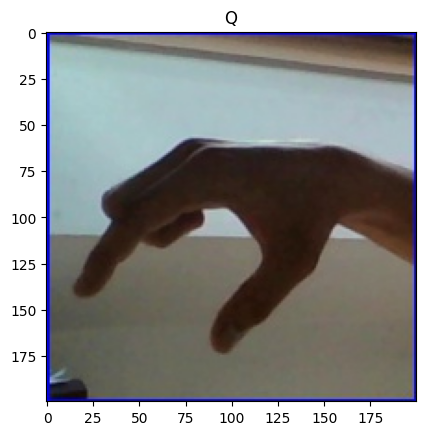

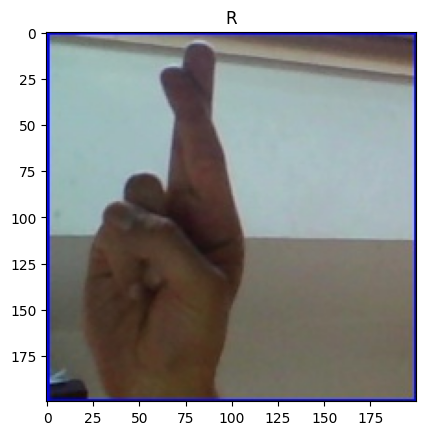

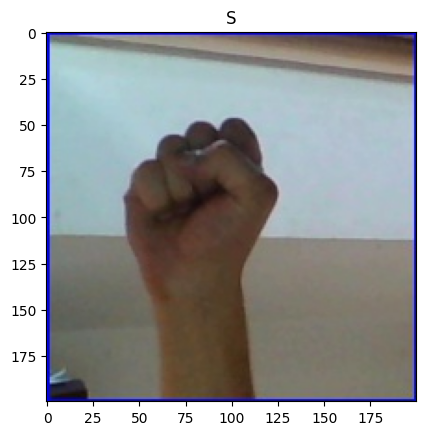

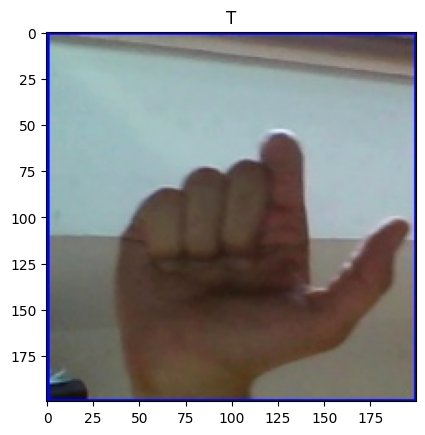

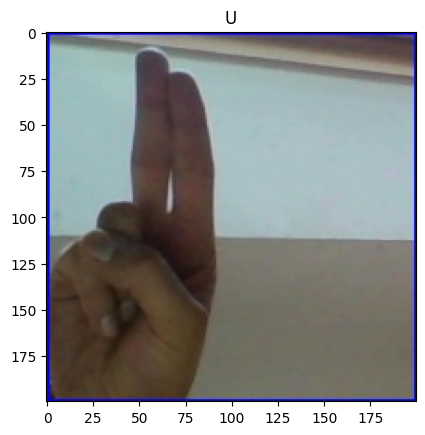

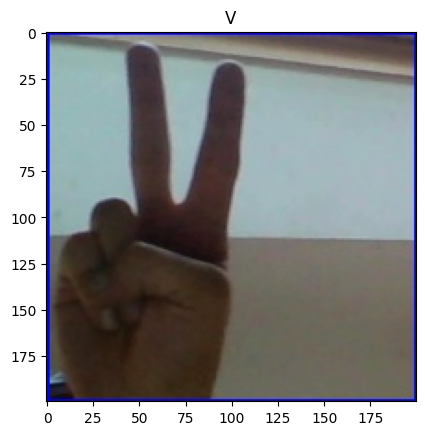

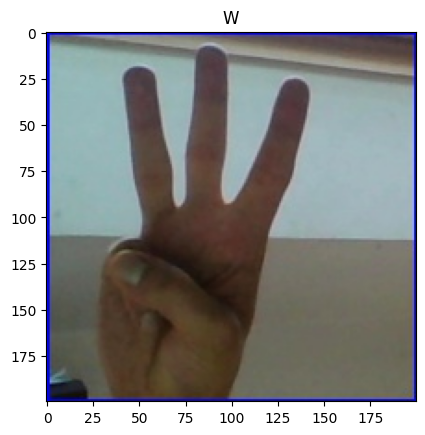

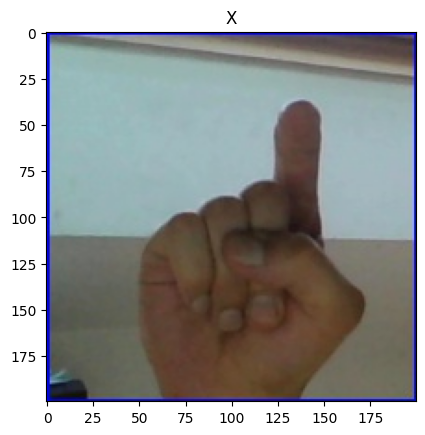

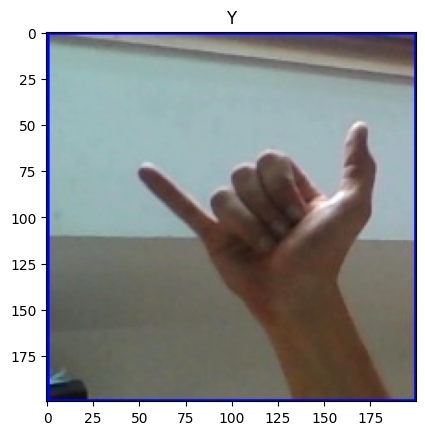

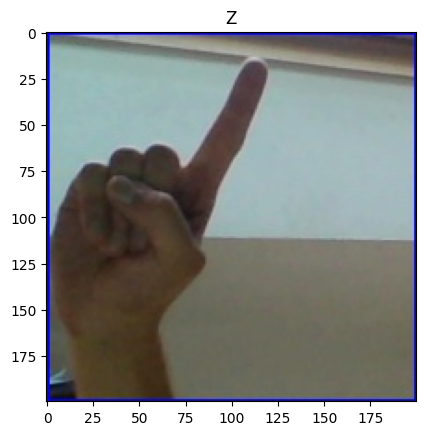

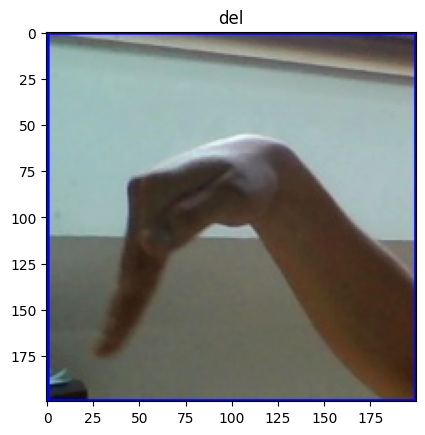

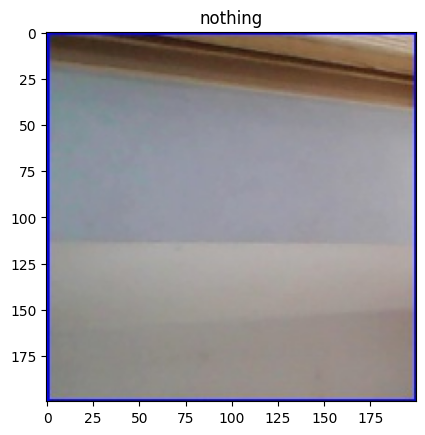

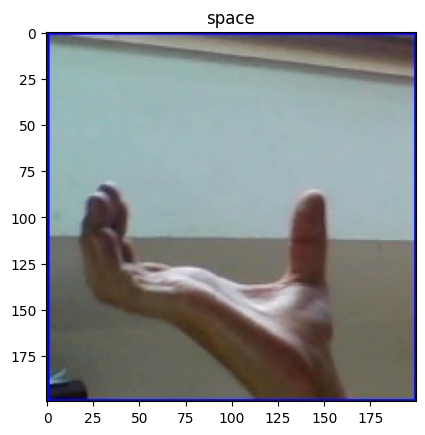

In [17]:
signs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
for i in signs:
  img = cv2.imread('/content/data/asl_alphabet_train/' + i +'/'+ i + '1.jpg')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(i)
  plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/data/asl_alphabet_train',
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/data/asl_alphabet_train',
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [5]:
print(train_generator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [8]:
# making the CNN architecture to train on images
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [9]:
# definnig the architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(29, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,763,677 (33.43 MB)

 Trainable params: 8,763,677 (33.43 MB)

 Non-trainable params: 0 (0.00 B)